In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [2]:
apollo_df = pd.read_csv("APOLLOHOSP.csv")

In [3]:
dataframe = apollo_df.copy()
df = dataframe.loc[3661:]

In [4]:
pd.options.mode.chained_assignment = None

In [5]:
df

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
3661,2010-09-06,APOLLOHOSP,EQ,412.75,415.00,415.50,409.10,410.95,410.50,412.64,16076,6.633607e+11,NaN,9928.0,0.6176
3662,2010-09-07,APOLLOHOSP,EQ,410.50,411.50,418.00,409.20,413.00,413.40,413.81,33433,1.383493e+12,NaN,21002.0,0.6282
3663,2010-09-08,APOLLOHOSP,EQ,413.40,417.40,420.00,411.00,417.50,417.05,417.03,49637,2.069995e+12,NaN,35297.0,0.7111
3664,2010-09-09,APOLLOHOSP,EQ,417.05,417.05,424.70,415.05,421.95,421.25,421.00,90974,3.830028e+12,NaN,33363.0,0.3667
3665,2010-09-13,APOLLOHOSP,EQ,421.25,425.80,445.00,418.10,432.00,430.70,432.98,180498,7.815163e+12,NaN,79176.0,0.4387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6342,2021-06-25,APOLLOHOSP,EQ,3203.25,3253.25,3465.00,3222.25,3431.50,3439.00,3391.12,3717669,1.260706e+15,189813.0,884915.0,0.2380
6343,2021-06-28,APOLLOHOSP,EQ,3439.00,3447.85,3490.00,3402.20,3437.00,3454.15,3450.58,1213113,4.185944e+14,73367.0,260954.0,0.2151
6344,2021-06-29,APOLLOHOSP,EQ,3454.15,3420.00,3604.95,3420.00,3600.00,3591.15,3567.16,2268589,8.092425e+14,114945.0,369951.0,0.1631
6345,2021-06-30,APOLLOHOSP,EQ,3591.15,3617.00,3659.85,3582.60,3617.70,3619.85,3622.15,1291906,4.679477e+14,77395.0,310595.0,0.2404


In [6]:
df.drop(["Symbol","Prev Close","Series","Last","Turnover","Trades","Deliverable Volume","%Deliverble"],inplace = True , axis = 1)

In [7]:
df

,Date,Open,High,Low,Close,VWAP,Volume
3661,2010-09-06,415.00,415.50,409.10,410.50,412.64,16076
3662,2010-09-07,411.50,418.00,409.20,413.40,413.81,33433
3663,2010-09-08,417.40,420.00,411.00,417.05,417.03,49637
3664,2010-09-09,417.05,424.70,415.05,421.25,421.00,90974
3665,2010-09-13,425.80,445.00,418.10,430.70,432.98,180498
...,...,...,...,...,...,...,...
6342,2021-06-25,3253.25,3465.00,3222.25,3439.00,3391.12,3717669
6343,2021-06-28,3447.85,3490.00,3402.20,3454.15,3450.58,1213113
6344,2021-06-29,3420.00,3604.95,3420.00,3591.15,3567.16,2268589
6345,2021-06-30,3617.00,3659.85,3582.60,3619.85,3622.15,1291906


In [8]:
df.describe()

,Open,High,Low,Close,VWAP,Volume
count,2686.000000,2686.000000,2686.000000,2686.000000,2686.000000,2.686000e+03
mean,1174.691549,1193.778723,1156.209605,1173.788217,1175.075953,4.333367e+05
std,550.790793,559.585206,542.296195,550.989318,551.049001,6.687636e+05
min,411.000000,415.500000,408.000000,409.550000,411.650000,2.583000e+03
25%,843.862500,856.437500,831.712500,842.712500,844.917500,1.149658e+05
50%,1159.775000,1177.850000,1141.075000,1157.300000,1159.320000,2.290300e+05
75%,1353.975000,1370.000000,1335.125000,1352.937500,1353.067500,5.073828e+05
max,3619.850000,3696.950000,3595.000000,3678.450000,3661.830000,1.149133e+07


In [9]:
df.set_index(["Date"],inplace = True)

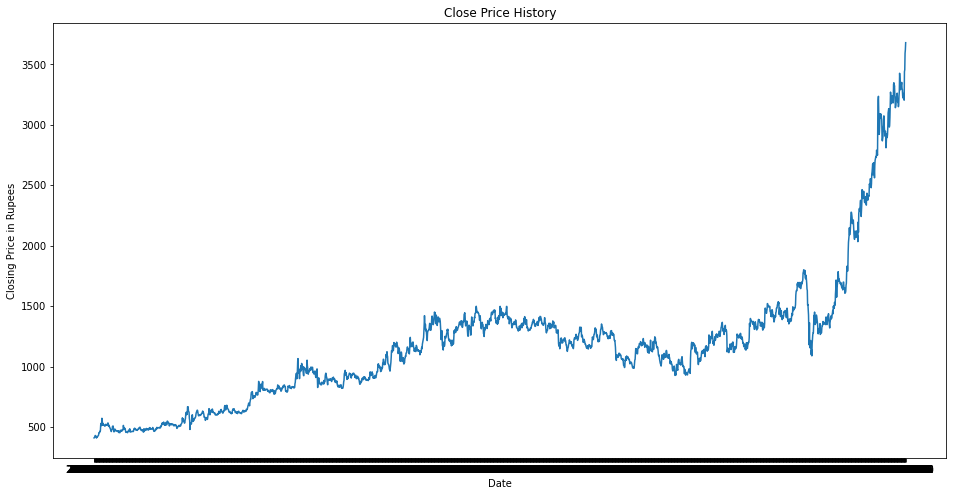

In [10]:
plt.figure(figsize=(16,8))
plt.title("Close Price History")
plt.plot(df['Close'])
plt.xlabel("Date")
plt.ylabel("Closing Price in Rupees")
plt.show()

In [11]:
df['Date'] = pd.to_datetime(df.index)
df['year'] = pd.DatetimeIndex(df.Date).year
df['month'] = pd.DatetimeIndex(df.Date).month
df['day'] = pd.DatetimeIndex(df.Date).day
df['weekday'] = pd.DatetimeIndex(df.Date).weekday

In [12]:
#Create a new dataframe with only "Close Price"
data = df.filter(["Close"])

In [13]:
data

,Close
Date,
2010-09-06,410.50
2010-09-07,413.40
2010-09-08,417.05
2010-09-09,421.25
2010-09-13,430.70
...,...
2021-06-25,3439.00
2021-06-28,3454.15
2021-06-29,3591.15


In [14]:
#Converting dataframe into numpy array
dataset = data.values

In [15]:
dataset

array([[ 410.5 ],
       [ 413.4 ],
       [ 417.05],
       ...,
       [3591.15],
       [3619.85],
       [3678.45]])

In [16]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [17]:
scaled_data

array([[2.90617639e-04],
       [1.17776622e-03],
       [2.29434978e-03],
       ...,
       [9.73293769e-01],
       [9.82073480e-01],
       [1.00000000e+00]])

In [18]:
#Training data

training_data_len = math.ceil(len(dataset) *.70)

In [19]:
training_data_len

1881

In [20]:
#Create the scaled training data set
train_data = scaled_data[0:training_data_len ,:]
train_data


array([[0.00029062],
       [0.00117777],
       [0.00229435],
       ...,
       [0.18975802],
       [0.20040381],
       [0.2106672 ]])

In [21]:
len(train_data)

1881

In [22]:
#Splitting into x_train and y_train datasets
x_train = []
y_train = []

for i in range(100,len(train_data)):
    x_train.append(train_data[i-100:i ,0])
    y_train.append(train_data[i,0])

In [23]:
#Converting datasets into numpy arrays
x_train , y_train = np.array(x_train),np.array(y_train)

In [24]:
x_train

array([[0.00029062, 0.00117777, 0.00229435, ..., 0.03192205, 0.02669094,
        0.02514607],
       [0.00117777, 0.00229435, 0.00357919, ..., 0.02669094, 0.02514607,
        0.02237756],
       [0.00229435, 0.00357919, 0.00647007, ..., 0.02514607, 0.02237756,
        0.02513078],
       ...,
       [0.19098168, 0.19067576, 0.18757074, ..., 0.18744838, 0.18318089,
        0.18217137],
       [0.19067576, 0.18757074, 0.18437395, ..., 0.18318089, 0.18217137,
        0.18975802],
       [0.18757074, 0.18437395, 0.18155955, ..., 0.18217137, 0.18975802,
        0.20040381]])

In [25]:
y_train

array([0.02237756, 0.02513078, 0.02425893, ..., 0.18975802, 0.20040381,
       0.2106672 ])

In [26]:
x_train.shape ,y_train.shape

((1781, 100), (1781,))

In [27]:
#Reshaping the data
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [28]:
#Building LSTM Model

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [29]:
#Train the Model
model.fit(x_train , y_train,batch_size=32,epochs=100)

Epoch 1/100
56/56 [==============================] - 8s 82ms/step - loss: 0.0023
Epoch 2/100
56/56 [==============================] - 5s 81ms/step - loss: 1.6068e-04
Epoch 3/100
56/56 [==============================] - 5s 81ms/step - loss: 1.4820e-04
Epoch 4/100
56/56 [==============================] - 5s 81ms/step - loss: 1.5038e-04
Epoch 5/100
56/56 [==============================] - 5s 81ms/step - loss: 1.4319e-04
Epoch 6/100
56/56 [==============================] - 5s 81ms/step - loss: 1.4079e-04
Epoch 7/100
56/56 [==============================] - 5s 81ms/step - loss: 1.3267e-04
Epoch 8/100
56/56 [==============================] - 5s 81ms/step - loss: 1.3495e-04
Epoch 9/100
56/56 [==============================] - 5s 81ms/step - loss: 1.5083e-04
Epoch 10/100
56/56 [==============================] - 5s 82ms/step - loss: 1.3248e-04
Epoch 11/100
56/56 [==============================] - 5s 81ms/step - loss: 1.1890e-04
Epoch 12/100
56/56 [==============================] - 5s 81ms/step 

56/56 [==============================] - 5s 86ms/step - loss: 4.5201e-05
Epoch 94/100
56/56 [==============================] - 5s 87ms/step - loss: 4.0607e-05
Epoch 95/100
56/56 [==============================] - 5s 83ms/step - loss: 4.2113e-05
Epoch 96/100
56/56 [==============================] - 5s 84ms/step - loss: 3.8030e-05
Epoch 97/100
56/56 [==============================] - 5s 84ms/step - loss: 4.3536e-05
Epoch 98/100
56/56 [==============================] - 5s 86ms/step - loss: 4.8824e-05: 3s - loss: 4.856
Epoch 99/100
56/56 [==============================] - 5s 86ms/step - loss: 4.9209e-05
Epoch 100/100
56/56 [==============================] - 5s 88ms/step - loss: 4.3265e-05


In [30]:
#Create the testing data set
test_data = scaled_data[training_data_len-100:,:]


len(test_data)

905

In [31]:
#Creating the x_test and y_test
x_test = []
y_test = dataset[training_data_len:,:]

for i in range(100,len(test_data)):
    x_test.append(test_data[i-100:i,0])

In [32]:
#Converting test data into numpy array

x_test =np.array(x_test)

In [33]:
x_test

array([[0.18437395, 0.18155955, 0.17726146, ..., 0.18975802, 0.20040381,
        0.2106672 ],
       [0.18155955, 0.17726146, 0.17931108, ..., 0.20040381, 0.2106672 ,
        0.2099483 ],
       [0.17726146, 0.17931108, 0.18070299, ..., 0.2106672 , 0.2099483 ,
        0.20110741],
       ...,
       [0.68951329, 0.70225458, 0.70701153, ..., 0.85463   , 0.92674906,
        0.93138365],
       [0.70225458, 0.70701153, 0.71036128, ..., 0.92674906, 0.93138365,
        0.97329377],
       [0.70701153, 0.71036128, 0.71248738, ..., 0.93138365, 0.97329377,
        0.98207348]])

In [34]:
x_test.shape

(805, 100)

In [35]:
y_test

array([[1095.85],
       [1066.95],
       [1083.7 ],
       [1076.3 ],
       [1061.1 ],
       [1086.3 ],
       [1109.55],
       [1076.  ],
       [1082.35],
       [1093.8 ],
       [1083.45],
       [1076.1 ],
       [1122.  ],
       [1134.  ],
       [1132.2 ],
       [1106.85],
       [1088.25],
       [1076.9 ],
       [1072.4 ],
       [1091.  ],
       [1080.05],
       [1069.3 ],
       [1101.4 ],
       [1080.9 ],
       [1071.6 ],
       [1045.5 ],
       [1024.15],
       [1044.9 ],
       [1023.7 ],
       [1041.8 ],
       [1029.45],
       [1017.8 ],
       [1016.65],
       [ 983.5 ],
       [ 968.3 ],
       [ 963.95],
       [ 966.55],
       [ 993.9 ],
       [ 985.15],
       [1004.9 ],
       [ 987.65],
       [ 950.35],
       [ 927.1 ],
       [ 941.15],
       [ 939.8 ],
       [ 930.1 ],
       [ 970.75],
       [1018.4 ],
       [ 999.4 ],
       [ 982.4 ],
       [ 975.2 ],
       [ 969.9 ],
       [1033.25],
       [1052.95],
       [1060.2 ],
       [10

In [36]:
y_test.shape

(805, 1)

In [37]:
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [38]:
#Getting predicted values of x_test using the model

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [39]:
predictions

array([[1093.4353 ],
       [1089.043  ],
       [1062.3219 ],
       [1083.706  ],
       [1073.0574 ],
       [1059.1473 ],
       [1085.9701 ],
       [1105.5569 ],
       [1069.0697 ],
       [1080.8665 ],
       [1090.1757 ],
       [1078.2928 ],
       [1072.3971 ],
       [1119.7968 ],
       [1125.7404 ],
       [1124.6506 ],
       [1099.7527 ],
       [1084.5748 ],
       [1074.2838 ],
       [1069.9364 ],
       [1088.3768 ],
       [1074.0532 ],
       [1065.1042 ],
       [1098.6879 ],
       [1073.161  ],
       [1067.9504 ],
       [1041.7544 ],
       [1022.9689 ],
       [1044.8378 ],
       [1019.5683 ],
       [1040.6521 ],
       [1024.9323 ],
       [1015.3654 ],
       [1014.89026],
       [ 981.318  ],
       [ 969.3347 ],
       [ 964.68146],
       [ 966.38025],
       [ 992.3949 ],
       [ 980.79767],
       [1002.41614],
       [ 983.2101 ],
       [ 949.1221 ],
       [ 929.1241 ],
       [ 943.0816 ],
       [ 938.803  ],
       [ 929.1041 ],
       [ 969.

In [40]:
predictions.shape

(805, 1)

In [41]:
#Calculating Root Mean Square Error Value 
rmse = np.sqrt(np.mean(np.power((np.array(y_test)-np.array(predictions)),2)))

In [42]:
rmse

57.476996139767316

In [43]:
rmspe = (np.sqrt(np.mean(np.square((y_test - predictions) / y_test)))) *100 

rmspe

2.7972563821615775

In [44]:
#Calculating Mean Absolute Error 
MAE = np.mean(np.array(y_test)-np.array(predictions))

MAE

22.427585267250585

In [45]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid["Predictions"] = predictions

valid

,Close,Predictions
Date,,
2018-04-03,1095.85,1093.435303
2018-04-04,1066.95,1089.042969
2018-04-05,1083.70,1062.321899
2018-04-06,1076.30,1083.706055
2018-04-09,1061.10,1073.057373
...,...,...
2021-06-25,3439.00,3087.822266
2021-06-28,3454.15,3446.054199
2021-06-29,3591.15,3259.821533


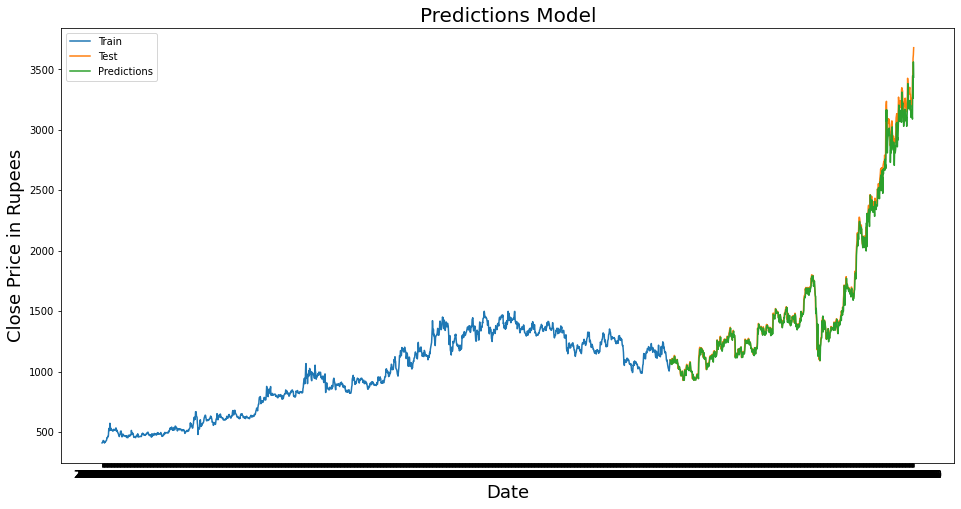

In [46]:
#Visualising the Data

plt.figure(figsize=(16,8))
plt.title("Predictions Model", fontsize = 20)
plt.xlabel("Date" , fontsize=18)
plt.ylabel("Close Price in Rupees" , fontsize = 18)
plt.plot(train["Close"])
plt.plot(valid[["Close","Predictions"]])
plt.legend(["Train","Test","Predictions"] ,loc="upper left")
plt.show()

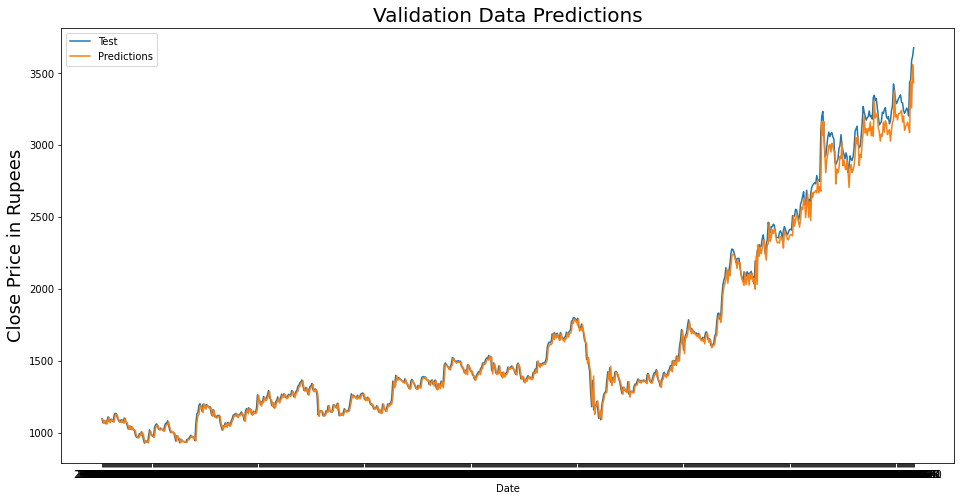

In [47]:
plt.figure(figsize=(16,8))
plt.title("Validation Data Predictions", fontsize = 20)

plt.xlabel("Date")
plt.ylabel("Close Price in Rupees" , fontsize = 18)
plt.plot(valid[["Close","Predictions"]])
plt.legend(["Test","Predictions"] ,loc="upper left")
plt.show()

In [48]:
len(test_data)

905

In [49]:
x_input=test_data[805:].reshape(1,-1)
x_input.shape


(1, 100)

In [50]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

temp_input


[0.7103612836122243,
 0.712487381076203,
 0.7099330049863869,
 0.7279971855976017,
 0.7179632292208388,
 0.7179632292208388,
 0.7153935574658141,
 0.8201841598091102,
 0.8544770412065221,
 0.8643427452659916,
 0.8251093640062407,
 0.7679647587873596,
 0.7709015265073879,
 0.7914589005475848,
 0.8107008473798526,
 0.8203982991220288,
 0.810394934075683,
 0.817277983419499,
 0.819159350240142,
 0.8098901771238032,
 0.8053320688916761,
 0.7555905656336994,
 0.7516442840099116,
 0.7576095934412187,
 0.7631160329162715,
 0.785218269142525,
 0.7914130135519594,
 0.8148612683165591,
 0.7916577441952951,
 0.7798188993239316,
 0.7724463886934443,
 0.7634219462204411,
 0.7761632353391049,
 0.7678576891309002,
 0.7341307473462021,
 0.7470861757777846,
 0.7696931689559179,
 0.7626724586252257,
 0.7600416042093672,
 0.7678270978004833,
 0.7874208449325462,
 0.8223714399339228,
 0.827510783443972,
 0.8328795619321485,
 0.7939062069809416,
 0.7865642876808713,
 0.7904646823090337,
 0.8111138303404816

In [51]:
#Prediction  for next 5 days

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<5):
    
    if(len(temp_input)>100):
        
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
    
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
    
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.9739614]
101
1 day input [0.71248738 0.709933   0.72799719 0.71796323 0.71796323 0.71539356
 0.82018416 0.85447704 0.86434275 0.82510936 0.76796476 0.77090153
 0.7914589  0.81070085 0.8203983  0.81039493 0.81727798 0.81915935
 0.80989018 0.80533207 0.75559057 0.75164428 0.75760959 0.76311603
 0.78521827 0.79141301 0.81486127 0.79165774 0.7798189  0.77244639
 0.76342195 0.77616324 0.76785769 0.73413075 0.74708618 0.76969317
 0.76267246 0.7600416  0.7678271  0.78742084 0.82237144 0.82751078
 0.83287956 0.79390621 0.78656429 0.79046468 0.81111383 0.84060387
 0.87494264 0.86249197 0.85365108 0.84588088 0.85089786 0.85340634
 0.86553581 0.852871   0.85495121 0.84789991 0.89429166 0.89865092
 0.88754627 0.89147726 0.87143993 0.85264156 0.8355716  0.83905901
 0.84246994 0.8627214  0.85973875 0.86824314 0.87232708 0.85352871
 0.8486188  0.85332987 0.83814127 0.84407599 0.86581113 0.876151
 0.92266512 0.90874606 0.88890758 0.88099972 0.886032   0.89208908
 0.89540824 0.89958396 0.88370706 0.

In [52]:
lst_output = scaler.inverse_transform(lst_output)

lst_output

array([[3593.33246265],
       [3380.92781542],
       [3203.35032899],
       [3061.08886099],
       [2937.32039598]])

In [53]:
future_values_df = pd.read_csv("apollofut.csv")
fut_df = future_values_df[:5]
fut_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-07-02,3701.000000,3744.899902,3667.000000,3733.199951,3730.923828,573795
1,2021-07-05,3760.000000,3762.949951,3702.699951,3718.100098,3715.833252,444545
2,2021-07-06,3717.899902,3750.750000,3696.000000,3706.250000,3703.990234,344090
3,2021-07-07,3715.000000,3757.800049,3697.600098,3715.600098,3713.334717,466002
4,2021-07-08,3700.000000,3720.000000,3657.000000,3671.399902,3669.161377,459811


In [54]:
fut_df.set_index(["Date"],inplace = True)
fut_data = fut_df.filter(["Close"])
fut_data

,Close
Date,
2021-07-02,3733.199951
2021-07-05,3718.100098
2021-07-06,3706.250000
2021-07-07,3715.600098
2021-07-08,3671.399902


In [55]:
next_5_days = fut_data[:5]

next_5_days

,Close
Date,
2021-07-02,3733.199951
2021-07-05,3718.100098
2021-07-06,3706.250000
2021-07-07,3715.600098
2021-07-08,3671.399902


In [56]:
Error =abs(np.mean(((next_5_days - lst_output) / next_5_days))*100)

Error

Close    12.798742
dtype: float64

In [57]:
future = fut_data[:5]

future["Prediction"] = lst_output

future

,Close,Prediction
Date,,
2021-07-02,3733.199951,3593.332463
2021-07-05,3718.100098,3380.927815
2021-07-06,3706.250000,3203.350329
2021-07-07,3715.600098,3061.088861
2021-07-08,3671.399902,2937.320396
